In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


INPUT_FILE = 'top-400000.TCCGTTCC'


In [4]:
df = pd.read_csv(INPUT_FILE, sep='\t')
df.columns=["offset","mer","count"] 

df.shape

df

,offset,mer,count
0,0,GTATATAC,36
1,0,GCACACCC,7
2,0,TGTAGCCT,1
3,0,ACCTCCAG,4
4,0,CTTCTACC,7
...,...,...,...
15944723,320,TANNNNNN,14266
15944724,320,CNNNNNNN,2
15944725,320,TNNNNNNN,1
15944726,320,AGNNNNNN,18767


In [5]:

position_counts = df['offset'].value_counts().to_frame()
position_counts.rename(columns={'offset': 'count'}, inplace=True)
position_counts['position'] = position_counts.index

position_counts

,count,position
144,55516,144
145,55345,145
294,55154,294
289,55069,289
292,55068,292
...,...,...
153,3076,153
317,1034,317
318,265,318
319,66,319


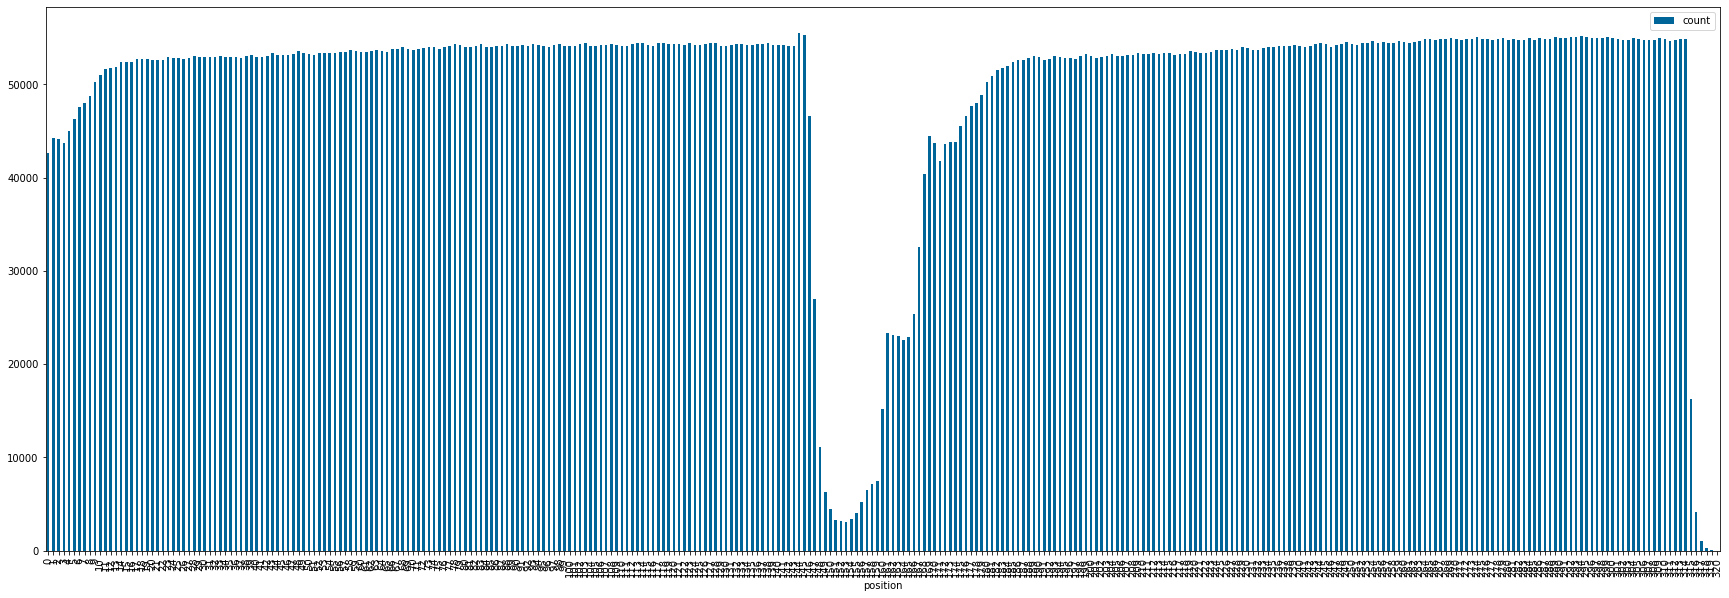

In [6]:
fig = position_counts.sort_values('position') .plot(x='position', y='count', kind='bar', figsize=(30,10), color='#006699')

In [7]:
fig.get_figure().savefig(INPUT_FILE+'-position_counts.png')

In [8]:
potentialpositions = position_counts.loc[position_counts['count'] < 50000].sort_values('count', ascending=True)


In [9]:
potentialpositions = potentialpositions['position'].to_list()

In [10]:
biodynamiindexes = ["TCCGTTCC", "GGCAAACG", "TCCTACGG", "GTATCATC", "GAGGCTAC", "GTAAGCGA", "GTCCTTCT"]

for i in potentialpositions:
    onefivethree = df.loc[df['offset'] == i]
    total = onefivethree.loc[onefivethree['mer'].isin(biodynamiindexes)]
    print(str(i)+":" +str(total.shape[0]))

320:0
319:0
318:0
317:0
153:1
152:1
151:0
154:1
155:2
316:0
150:1
156:1
149:1
157:1
158:2
159:2
148:2
160:1
315:0
164:2
165:3
163:2
162:3
161:7
166:4
147:3
167:4
168:5
171:5
0:7
172:6
3:5
170:5
174:5
173:5
2:4
1:5
169:5
4:4
175:4
5:5
146:4
176:5
6:4
177:5
7:5
178:5
8:5
179:5
